In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Preparing Training Data

In [2]:
train = pd.read_csv("./exercise_40_train.csv")
train.head(20)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935
5,0,1.926053,19.524376,Saturday,3.702574,2.300792,-0.331106,0.0079%,3.085443,0.472701,...,-0.689223,5.253010,no,NaN,NaN,9.882197,5.632881,0,NaN,97.129172
6,0,0.094162,18.894755,Thursday,2.027918,1.580408,1.190932,0.0174%,-0.331730,2.178622,...,1.095847,NaN,no,5.132039,0.973211,9.076239,9.197448,0,yes,89.613323
7,0,0.921300,19.160713,Sat,-1.274067,-0.867023,-2.036134,-0.0106%,2.830838,1.206701,...,-0.512785,1.986687,no,3.625493,-0.113036,12.495594,6.927711,0,yes,102.151914
8,0,0.589354,21.627989,Wednesday,1.672593,0.158446,2.073026,0.0032%,-0.908026,-0.064304,...,NaN,5.221553,no,4.270353,1.072603,9.789410,7.349307,0,yes,96.251348
9,0,1.016857,21.440000,Tuesday,-2.619848,0.637245,1.357868,0.0091%,1.471836,0.811922,...,NaN,7.427018,no,2.794465,0.219889,10.211048,10.970247,0,NaN,97.814997


## Categorical Data

In [3]:
train.loc[:,train.dtypes==np.object].head(20)

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,0.0062%,$-908.650758424405,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.0064%,$-1864.9622875143,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-8e-04%,$-543.187402955527,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.0057%,$-182.626380634258,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.0109%,$967.007090837503,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes
5,Saturday,0.0079%,$271.163475698959,female,no,Florida,5-10 miles,August,progressive,mercedes,no,NaN
6,Thursday,0.0174%,$749.965009681221,male,no,Nebraska,5-10 miles,December,allstate,toyota,no,yes
7,Sat,-0.0106%,$32.7532387681275,male,yes,California,5-10 miles,January,farmers,NaN,no,yes
8,Wednesday,0.0032%,$1079.84051477389,male,no,California,5-10 miles,March,allstate,NaN,no,yes
9,Tuesday,0.0091%,$-1668.77796649785,male,no,NaN,5-10 miles,December,esurance,chevrolet,no,NaN


Features x7 and x19 are really continuous variables. Change these into numeric variables.

In [4]:
# change x7 and x19 to continuous variables
train['x7'] = train.x7.str.replace("%",'').astype(np.float64)
train['x19'] = train.x19.str.replace("$",'').astype(np.float64)

# summarize the remaining categorical variables
train.loc[:,train.dtypes==np.object].describe()

,x3,x24,x31,x33,x39,x60,x65,x77,x93,x99
count,40000,36144,40000,32829,40000,40000,40000,30743,40000,27164
unique,14,2,2,51,1,12,5,7,2,1
top,Wednesday,female,no,California,5-10 miles,December,progressive,ford,no,yes
freq,4930,18158,34022,3393,40000,8136,10877,9005,35506,27164


Some observations:

Col. x3 contains strings indicating days of the week with more than one name for each day. Keep only the first three characters of each entry to have a consistent label for each day.

Col. x24 contains "male" or "female" binary response, with some missing values.

Col. x33 lists states plus DC, and has many missing values.

Col. x39 contains the string "5-10 miles" for every entry with no missing values. This column is independent of rows, so I will drop it as a feature.

Col. x77 has many missing values. 

Col. x99 contains a binary response with either the string "yes" or NaN, so I'll treat NaN as its own category, likely indicating a negative response, rather than missing info. 

In [5]:
# drop column x39
train.drop('x39',axis=1,inplace=True)

In [6]:
# Fill in missing data for column x99
train["x99"] = train["x99"].fillna("U")

In [7]:
# Set all days in Col. x3 to a consistent naming convention:
train['x3'] = train['x3'].str[:3]

In [8]:
train["x3"].value_counts()

Wed    6973
Tue    6863
Mon    6344
Fri    5595
Sat    5383
Thu    4434
Sun    4408
Name: x3, dtype: int64

Examine frequency of $y$ by day of the week.

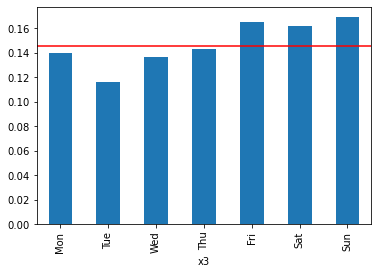

In [9]:
train.groupby(by="x3")["y"].mean()[["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]].plot(kind="bar")
plt.axhline(y=train.y.mean(),color='r')
plt.show()

There's a clear trend that 'y' is more frequent on Fridays, Saturdays, and Sundays.

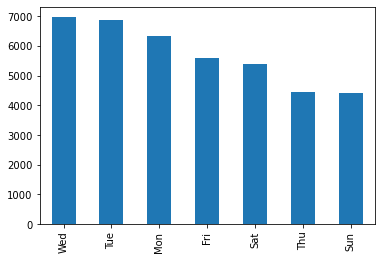

In [10]:
plt.figure()
train.x3.value_counts().plot(kind='bar')
plt.show()

Examining the months, observe that the value counts are imbalanced. Seeing this, I'll try to group some of the smaller categories into larger buckets.

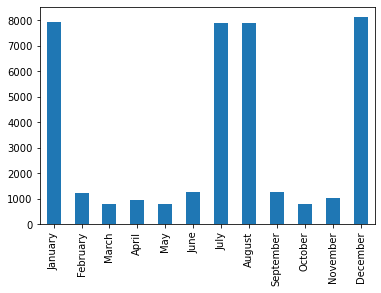

In [11]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
train["x60"].value_counts()[months].plot(kind="bar")
plt.show()

In [12]:
train[['y','x60']].groupby(by='x60').agg(['mean','count']).sort_values(by=('y','mean'),ascending=False)

y      
               mean count
x60                      
March      0.158612   807
September  0.155823  1245
November   0.153404  1043
October    0.152585   793
January    0.149836  7922
February   0.146744  1213
August     0.145441  7907
April      0.144059   951
July       0.142947  7912
December   0.140610  8136
June       0.137579  1272
May        0.122653   799

Using some domain knowlege, that consecutive months in the calender should have similar behavior qualitatively, I'll combine February, March, and April; May, and June; and September, October, and November into three distinct buckets based on thier calendar positions and similarity of the overal frequency of the target variable. The remaining months, which have larger sample sizes, will remain in their own categories.

In [13]:
train['x60'] = train['x60'].replace(
    {
        "February":"FebMarApr",
        "March":"FebMarApr",
        "April":"FebMarApr",
        "May":"MayJun",
        "June":"MayJun",
        "September":"SepOctNov",
        "October":"SepOctNov",
        "November":"SepOctNov"
    }
)

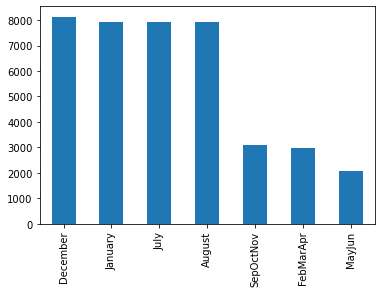

In [14]:
plt.figure()
train.x60.value_counts().plot(kind="bar")
plt.show()

Now let's consider the columns with many missing entries: Columns x33 and x77 contain many missing values; appearing more frequently than any of the other categories in those columns, while Column x24 is missing data in about 10% of entries.

In column x24, 'y' occurs with roughly the same rate for all cartegories. We'll treat the missing entries as a separate, unknown category, rather than combining it with either response.

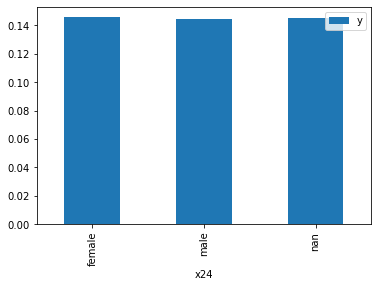

In [15]:
train.groupby(by="x24",dropna=False)[["y"]].mean().plot(kind="bar")
plt.show()

In [16]:
train["x24"] = train["x24"].fillna("U")

Now, examining the states, the occurences of each state appear roughtly proportional to their populations. 

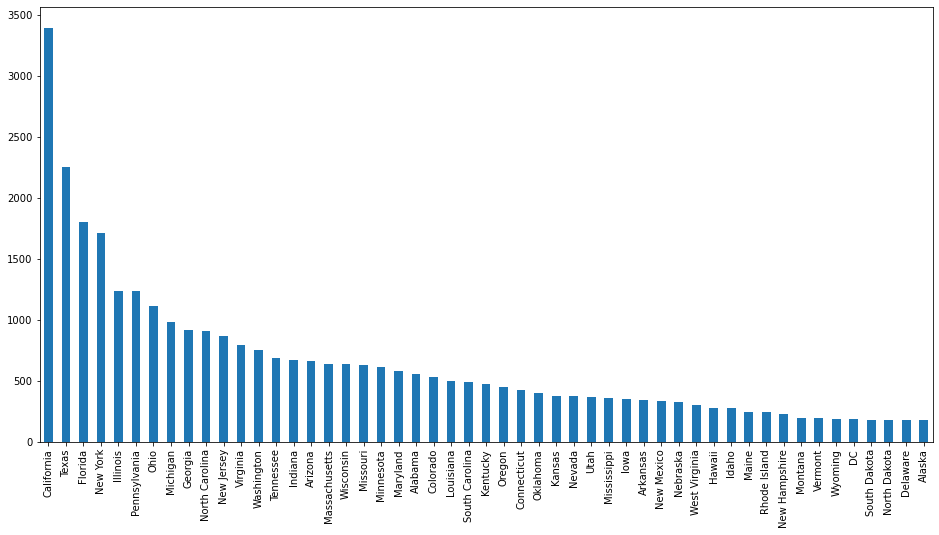

In [17]:
plt.figure(figsize=(16,8))
train["x33"].value_counts().plot(kind='bar')
plt.show()

There are larger discrepancies in frequency of 'y' in each state. The frequencies of the target variable do *not* seem to exhibit any noticable geographic patterns. The states with highest freqency of the target variable appear to be states with less population density, but there does not seem to be any other demographic pattern.

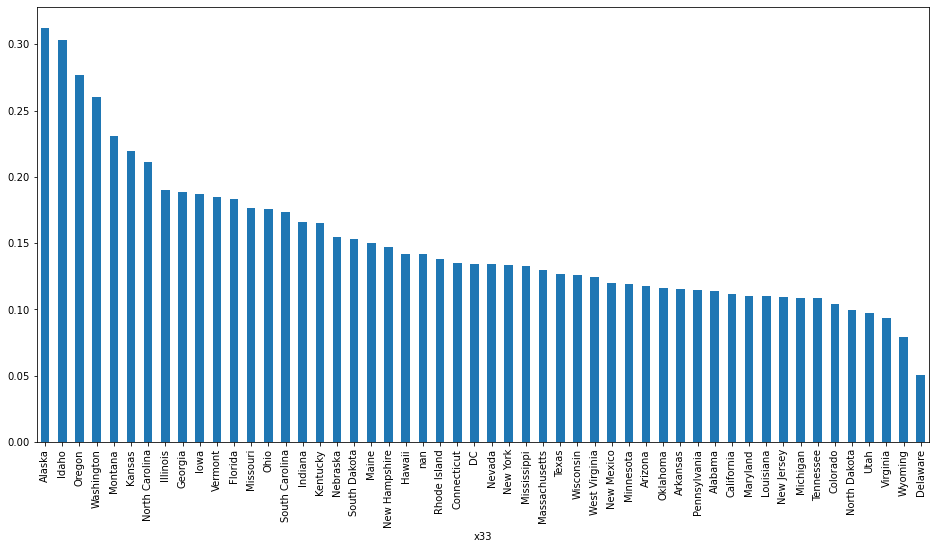

In [18]:
plt.figure(figsize=(16,8))
train.groupby(by="x33",dropna=False)["y"].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

First, put the states into a total of 10 bins based on their observed frequency of the target variable, 'y'.

In [19]:
df = train[["x33","y"]].groupby(by='x33',dropna=False).agg(['mean','count'])
df["bin"] = pd.cut(df[("y","mean")], np.linspace(.01,.34,12) )
df.sort_values(by=("y","mean"),ascending=False)

y                 bin
                    mean count              
x33                                         
Alaska          0.312500   176  (0.31, 0.34]
Idaho           0.303249   277  (0.28, 0.31]
Oregon          0.276549   452  (0.25, 0.28]
Washington      0.260000   750  (0.25, 0.28]
Montana         0.230769   195  (0.22, 0.25]
Kansas          0.219577   378  (0.19, 0.22]
North Carolina  0.210989   910  (0.19, 0.22]
Illinois        0.190323  1240  (0.19, 0.22]
Georgia         0.188453   918  (0.16, 0.19]
Iowa            0.186969   353  (0.16, 0.19]
Vermont         0.184615   195  (0.16, 0.19]
Florida         0.183130  1802  (0.16, 0.19]
Missouri        0.176656   634  (0.16, 0.19]
Ohio            0.175943  1114  (0.16, 0.19]
South Carolina  0.173116   491  (0.16, 0.19]
Indiana         0.166172   674  (0.16, 0.19]
Kentucky        0.165272   478  (0.16, 0.19]
Nebraska        0.154799   323  (0.13, 0.16]
South Dakota    0.153005   183  (0.13, 0.16]
Maine           0.149798   247  (0.13, 0.16]
New Hampshire   0.147186   231  (0.13, 0.16]
Hawaii          0.141844   282  (0.13, 0.16]
NaN             0.141821  7171  (0.13, 0.16]
Rhode Island    0.138211   246  (0.13, 0.16]
Connecticut     0.135071   422  (0.13, 0.16]
DC              0.134409   186  (0.13, 0.16]
Nevada          0.134048   373  (0.13, 0.16]
New York        0.133606  1714  (0.13, 0.16]
Mississippi     0.132964   361  (0.13, 0.16]
Massachusetts   0.130094   638  (0.13, 0.16]
Texas           0.126998  2252   (0.1, 0.13]
Wisconsin       0.125984   635   (0.1, 0.13]
West Virginia   0.124590   305   (0.1, 0.13]
New Mexico      0.120120   333   (0.1, 0.13]
Minnesota       0.119476   611   (0.1, 0.13]
Arizona         0.117293   665   (0.1, 0.13]
Oklahoma        0.115869   397   (0.1, 0.13]
Arkansas        0.115607   346   (0.1, 0.13]
Pennsylvania    0.114355  1233   (0.1, 0.13]
Alabama         0.113718   554   (0.1, 0.13]
California      0.111701  3393   (0.1, 0.13]
Maryland        0.110155   581   (0.1, 0.13]
Louisiana       0.109780   501   (0.1, 0.13]
New Jersey      0.109195   870   (0.1, 0.13]
Michigan        0.108961   982   (0.1, 0.13]
Tennessee       0.108696   690   (0.1, 0.13]
Colorado        0.103774   530   (0.1, 0.13]
North Dakota    0.099448   181   (0.07, 0.1]
Utah            0.097297   370   (0.07, 0.1]
Virginia        0.093552   791   (0.07, 0.1]
Wyoming         0.079365   189   (0.07, 0.1]
Delaware        0.050847   177  (0.04, 0.07]

There's a noticiable decline in rate of 'y' begining with Colorado, so I'll combine the two smallest bins and include the state of Colorado with the least frequent states, and I'll also combine the four bins with highest frequency. The resulting five bins will be labeled "VeryLow", "Low", "Medium", "High", and "VeryHigh", respectively. Here the NaN's are naturally categorized based on the overall rates of 'y'. All missing data is categorized into the "Medium" label.

In [20]:
df = train[["x33","y"]].groupby(by='x33',dropna=False).agg(['mean','count'])
df["bin"] = pd.cut(df[("y","mean")], bins=[.03,.105,.13,.16,.19,.34], labels=["VeryLow","Low","Medium","High","VeryHigh"] )
df.sort_values(by=("y","mean"),ascending=False)

y             bin
                    mean count          
x33                                     
Alaska          0.312500   176  VeryHigh
Idaho           0.303249   277  VeryHigh
Oregon          0.276549   452  VeryHigh
Washington      0.260000   750  VeryHigh
Montana         0.230769   195  VeryHigh
Kansas          0.219577   378  VeryHigh
North Carolina  0.210989   910  VeryHigh
Illinois        0.190323  1240  VeryHigh
Georgia         0.188453   918      High
Iowa            0.186969   353      High
Vermont         0.184615   195      High
Florida         0.183130  1802      High
Missouri        0.176656   634      High
Ohio            0.175943  1114      High
South Carolina  0.173116   491      High
Indiana         0.166172   674      High
Kentucky        0.165272   478      High
Nebraska        0.154799   323    Medium
South Dakota    0.153005   183    Medium
Maine           0.149798   247    Medium
New Hampshire   0.147186   231    Medium
Hawaii          0.141844   282    Medium
NaN             0.141821  7171    Medium
Rhode Island    0.138211   246    Medium
Connecticut     0.135071   422    Medium
DC              0.134409   186    Medium
Nevada          0.134048   373    Medium
New York        0.133606  1714    Medium
Mississippi     0.132964   361    Medium
Massachusetts   0.130094   638    Medium
Texas           0.126998  2252       Low
Wisconsin       0.125984   635       Low
West Virginia   0.124590   305       Low
New Mexico      0.120120   333       Low
Minnesota       0.119476   611       Low
Arizona         0.117293   665       Low
Oklahoma        0.115869   397       Low
Arkansas        0.115607   346       Low
Pennsylvania    0.114355  1233       Low
Alabama         0.113718   554       Low
California      0.111701  3393       Low
Maryland        0.110155   581       Low
Louisiana       0.109780   501       Low
New Jersey      0.109195   870       Low
Michigan        0.108961   982       Low
Tennessee       0.108696   690       Low
Colorado        0.103774   530   VeryLow
North Dakota    0.099448   181   VeryLow
Utah            0.097297   370   VeryLow
Virginia        0.093552   791   VeryLow
Wyoming         0.079365   189   VeryLow
Delaware        0.050847   177   VeryLow

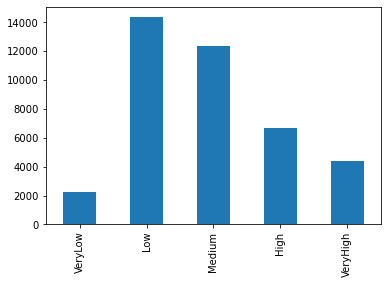

In [21]:
state_map = {}
for index, row in df.iterrows():
    state_map[index] = row.bin.iloc[0]
    
train['x33'] = train['x33'].replace(state_map)

plt.figure()
train.x33.value_counts()[["VeryLow","Low","Medium","High","VeryHigh"]].plot(kind='bar')
plt.show()

For the last column, 'x77', I again want to combine some responses into a smaller number of categories. The least frequent responses are 'buick', 'nissan', and 'toyota'. The three responses have similar rates of occurrence for the target variable, so I will create a category 'ToyotaNissanBuick' to bucket these responses. There are enough missing values that we can treat them as their own category.

In [22]:
train.groupby(by='x77',dropna=False)['y'].mean().sort_values(ascending=False)

x77
nissan       0.150680
toyota       0.150211
buick        0.148674
ford         0.146474
subaru       0.146225
chevrolet    0.143484
NaN          0.142919
mercedes     0.139074
Name: y, dtype: float64

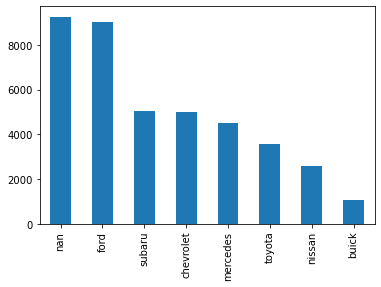

In [23]:
train["x77"].value_counts(dropna=False).plot(kind="bar")
plt.show()

In [24]:
train["x77"] = train["x77"].fillna("U")
train['x77'] = train["x77"].replace({"toyota":"ToyotaNissanBuick",
                                    "nissan":"ToyotaNissanBuick",
                                    "buick":"ToyotaNissanBuick"})

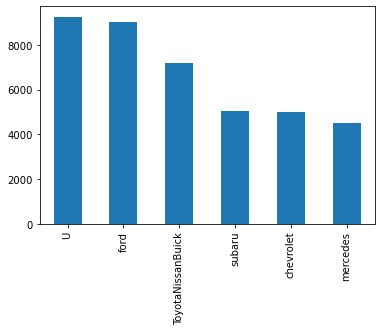

In [25]:
train.x77.value_counts().plot(kind='bar')
plt.show()

Now, look at the insurer resposnes in column 'x65'. There are enough responses for each category, and with similar enough rates of the target variable, that they can be treated separately.

In [26]:
train.x65.value_counts()

progressive    10877
allstate       10859
esurance        7144
farmers         5600
geico           5520
Name: x65, dtype: int64

In [27]:
train.groupby(by='x65')['y'].mean().sort_values(ascending=False)

x65
progressive    0.151237
esurance       0.145997
geico          0.144384
allstate       0.143752
farmers        0.135179
Name: y, dtype: float64

Finally summarize the data after all changes have been made.

In [28]:
train.loc[:,train.dtypes==np.object].describe()

,x3,x24,x31,x33,x60,x65,x77,x93,x99
count,40000,40000,40000,40000,40000,40000,40000,40000,40000
unique,7,3,2,5,7,5,6,2,2
top,Wed,female,no,Low,December,progressive,U,no,yes
freq,6973,18158,34022,14348,8136,10877,9257,35506,27164


## Continuous Data

### Missing Data

Some of the continuous variables have *a lot* of missing data, particularly 'x44', 'x57', and 'x30' with more than 80% of data points missing. We could drop these variables from the data entirely, but the feature selection methods in the following notebook should eliminate the influence of these variables as they likely add no valuable predictive insights.

In [29]:
train.loc[:,train.dtypes==np.float64].isna().sum().sort_values(ascending=False).head()

x44    34247
x57    32464
x30    32336
x55    17696
x52    16182
dtype: int64

### Correlation Matrix

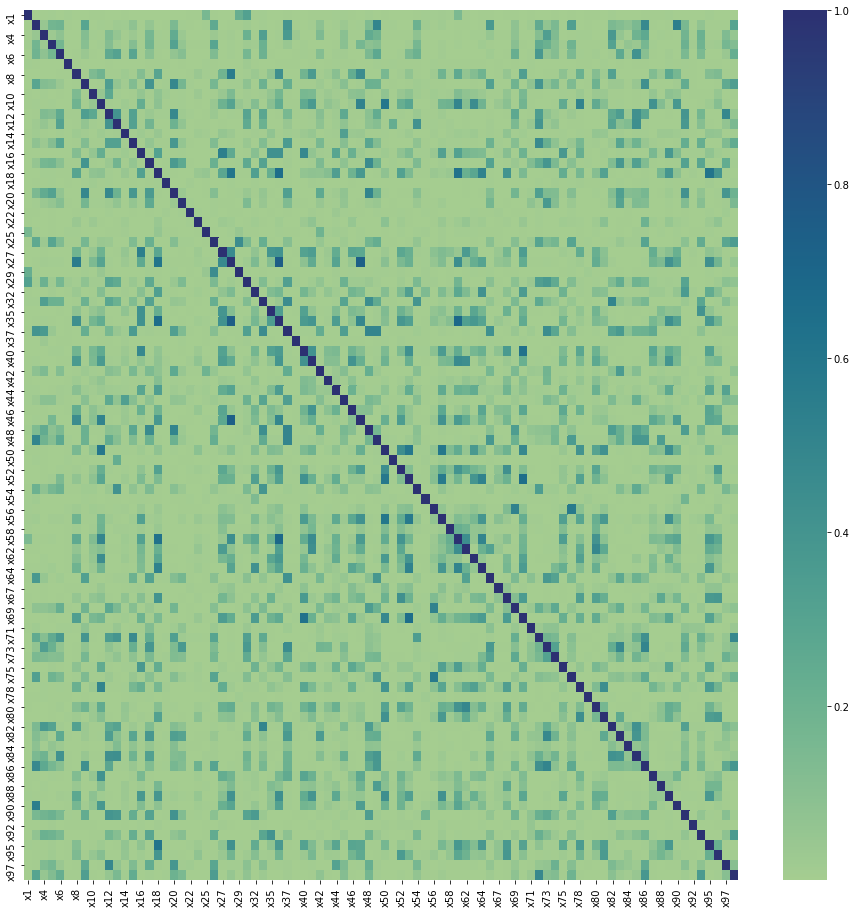

In [30]:
plt.figure(figsize=(16,16))
cmap=sns.color_palette("crest", as_cmap=True)
sns.heatmap(train.loc[:,train.dtypes==np.float64].corr().abs(), cmap=cmap)
plt.show()

In [31]:
n_col = train.loc[:,train.dtypes==np.float64].columns.shape[0]
# the first n_col entries are all equal to 1.0
# print every other entry since they are repeated by symmetry
train.loc[:,train.dtypes==np.float64].corr().abs().unstack().sort_values(ascending=False)[n_col::2]

x36  x28    7.555635e-01
x47  x28    7.413576e-01
x61  x36    6.864962e-01
x36  x18    6.557742e-01
x53  x70    6.512150e-01
                ...     
x85  x8     3.675271e-05
x20  x92    1.612987e-05
x53  x30    1.577683e-05
x90  x13    1.102654e-05
x1   x19    4.994236e-07
Length: 3828, dtype: float64

'x36', 'x47', and 'x28' are somewhat correlated with $r>.7$. Let's examine the correlations between these variables and the target variable.

In [32]:
print(train.y.corr(train.x28))
print(train.y.corr(train.x36))
print(train.y.corr(train.x47))

0.05184194167331495
-0.027166254863337305
-0.12344491481294265


'x47' has the strongest correlation with the target variable. Because the correlations between the feature are not excessively large ($r < .8$), all three variables can be used.

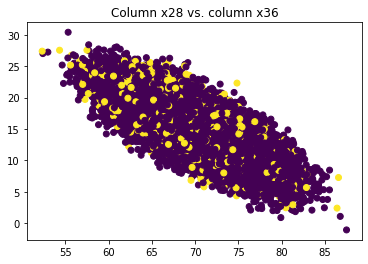

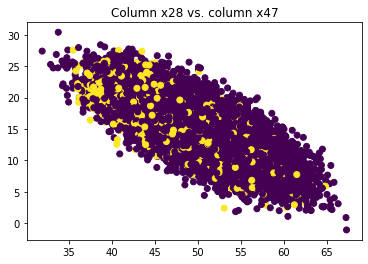

In [33]:
plt.figure()
plt.scatter(train.x36,train.x28,c=train.y)
plt.title("Column x28 vs. column x36")
plt.show()

plt.figure()
plt.scatter(train.x47,train.x28,c=train.y)
plt.title("Column x28 vs. column x47")
plt.show()
plt.show()

###  Feature Scaling

Some classification algorithms, particularly logistic regression, require data on similar scales. I will normalize scales of each feature to mean zero and unit standard deviation, and afterward fill in any missing continuous data with the median value.

In [34]:
train_cat = train.loc[:,train.dtypes==np.object].copy()
train_num = train.loc[:,train.dtypes==np.float64].copy()
y_train = train.y.copy()

# normalize all continuous data
scaler = StandardScaler()
train_num_scal = scaler.fit_transform(train_num)

# fill in all missing continuous data with median
imputer = SimpleImputer(strategy="median")
train_num_scal_tf = pd.DataFrame( imputer.fit_transform(train_num_scal), 
                                 columns = train_num.columns, index = train_num.index )

Get dummy variables for categorical variables. For each categorical vaiable we'll use the modal response as the reference class (indicated by comments).

In [35]:
train_cat_dum = pd.get_dummies(train_cat)[[
    'x3_Mon','x3_Tue','x3_Thu','x3_Fri','x3_Sat','x3_Sun',#'x3_Wed',
    'x24_male','x24_U',#'x24_female',
    'x31_yes',#'x31_no',
    'x33_VeryLow','x33_Medium','x33_High','x33_VeryHigh',#'x33_Low',
    'x60_January','x60_FebMarApr','x60_MayJun','x60_July','x60_August','x60_SepOctNov',#'x60_December',
    'x65_allstate', 'x65_esurance', 'x65_farmers','x65_geico',#'x65_progressive'
    'x77_ford','x77_subaru','x77_mercedes','x77_chevrolet','x77_ToyotaNissanBuick',#'x77_U',
    'x93_yes',#'x93_no',
    'x99_U',#'x99_yes',
]]
train_clean = pd.concat([train_num_scal_tf,train_cat_dum], axis=1)